[slides link](exercises-en-machine-learning-basics-tutorial1.slides.html)

In [2]:
%%bash

### Uncomment next line to convert to slides:
jupyter nbconvert --to=slides --reveal-prefix='https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.1.0' ./exercises-en-machine-learning-basics-tutorial1.ipynb

Couldn't find program: 'bash'


# ML I,II: Tutorial

## Today's Agenda

0. Python Installation
0. Jupyter Notebook
1. Review of some Python basics
2. Python standard library
2. Third-party libraries
    - `numpy`
    - `matplotlib`
3. Basic data analysis and regression

# Python Installation

* Two options:
    1. Individual packages (via apt-get, macports, etc.)
    1. A Python distribution
* http://scipy.org/install.html


# Jupyter Notebook

* Installation:
    * Installing Jupyter with pip
* Usage:
    * jupyter notebook --port 8888
    * localhost:8888
* https://jupyter.org/


# More Python Basics

* Collection Data Structures
    - list
    - tuple
    - dict
    - set
* Functions
* Python Memory Model

## Collections: list

In [8]:
l = [1, 2, 3, 4, 5, "six"]
print(l)
print(type(l))

[1, 2, 3, 4, 5, 'six']
<class 'list'>


In [9]:
len(l)

6

In [10]:
print(4 in l, 7 in l)

True False


Indexing lists:

In [5]:
print(l)

[1, 2, 3, 4, 5, 'six']


In [11]:
l

[1, 2, 3, 4, 5, 'six']

In [6]:
l[0]

1

In [7]:
l[-1]

'six'

In [8]:
print(l)

[1, 2, 3, 4, 5, 'six']


In [9]:
l[2:4] ## slicing

[3, 4]

In [10]:
l[:3]

[1, 2, 3]

Modifying lists:

In [11]:
l[-1] = 'seven'
l[2:4] = [7, 8]
l

[1, 2, 7, 8, 5, 'seven']

In [12]:
l.pop()

'seven'

In [13]:
l

[1, 2, 7, 8, 5]

In [14]:
l.append("eight")
l

[1, 2, 7, 8, 5, 'eight']

In [15]:
l.reverse()
l

['eight', 5, 8, 7, 2, 1]

Concatenation and repetition:

In [13]:
l = [7, 1, 2]
r = [9, 6, 8]
l + r*2

[7, 1, 2, 9, 6, 8, 9, 6, 8]

Two ways to sort:

In [14]:
print(l)
l.sort()
print(l)

[7, 1, 2]
[1, 2, 7]


In [16]:
print(r)
sorted(r)

[9, 6, 8]


[6, 8, 9]

In [17]:
print(r)

[9, 6, 8]


List comprehension:

In [20]:
l = [1, 2, 3, 4]

[x**2 for x in l]

[1, 4, 9, 16]

In [21]:
[x**2 for x in l if x % 2 == 0]

[4, 16]

## Collections: tuple

In [22]:
t = (1, 2, 'three')

In [23]:
len(t)

3

In [24]:
t[1]

2

In [25]:
# t[1] = 4  ## cannot be modified

## Collections: dict

In [26]:
d = {'a': 1, 'b': 2, 3: 4}

d['a']  ### lookup

1

In [27]:
d.keys()

dict_keys(['a', 'b', 3])

In [28]:
d.values()

dict_values([1, 2, 4])

## Collections: set

In [29]:
s = {1, 2, 3, 1, 3, 1, 4}
s

{1, 2, 3, 4}

In [30]:
s.intersection([3, 4, 5])

{3, 4}

In [31]:
s.union([7])

{1, 2, 3, 4, 7}

## Summary of Collections
* list: [v1, v2, v3]
* tuple: (v1, v2, v3)
    - similar to list, cannot modify
* set: {v1, v2, v3}
    - similar to list, no duplicated elements
* dictionary: {k1:v1, k2: v2, k3:v3}

## Functions

In [32]:
def square_sum(x, y):
    v = x*x + y*y
    return v

print(square_sum(2, 2))

8


## Default values and keyword arguments

In [2]:
def square_sum2(x, y=1):
    return x**2 + y**2

square_sum2(2)

5

In [3]:
square_sum2(1, y=3)

10

In [4]:
square_sum2(1, 3)

10

In [18]:
def square_sum3(x, y=1, z=2):
    return x**2 + y**2 + z

square_sum3(2)

7

In [20]:
square_sum3(2, z=3)

8

## Lambda expressions and higher-order functions

In [35]:
def apply(function, argument):
    return function(argument)

apply(lambda x: x + 1, 3)
# lambda arg1,arg2,... : expression, value1, value2,...

4

In [122]:
max = lambda m, n: m if m > n else n

print(max(10, 3))

10


In [36]:
l = [1, 2, 3]
#apply(square_sum2, 2)
[square_sum2(x) for x in l]

[2, 5, 10]

## Useful built-in functions

In [37]:
things = ["cat", "apple", "boat"]
sorted(things) # alphabetically, upper case first

['apple', 'boat', 'cat']

In [38]:
sorted(things, key=lambda x: len(x))

['cat', 'boat', 'apple']

In [39]:
enumerate(things)

In [40]:
list(enumerate(things, 2))  ## the second argument is the first index,

[(2, 'cat'), (3, 'apple'), (4, 'boat')]

In [41]:
### sum over collections
numbers = [14, 13, 15]
sum(numbers) ### works with non-numbers, too

42

In [42]:
list(zip(numbers, things))

[(14, 'cat'), (13, 'apple'), (15, 'boat')]

In [43]:
[str(x) + ' ' + y + 's' for x, y in zip(numbers, things)]

['14 cats', '13 apples', '15 boats']

In [44]:
## By the way: there are better ways to interpolate strings:
"{count:.2f} {thing}s".format(thing="zebra", count=3.14159)

'3.14 zebras'

### Range Objects

In [45]:
range(12)

range(0, 12)

In [46]:
list(range(12))  ## endpoint is not included

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [47]:
sum(range(12))

66

In [48]:
list(range(32, 7, -3))

[32, 29, 26, 23, 20, 17, 14, 11, 8]

## Python memory model

### What is printed here?

```
some_guy = 'Fred'

names = []
names.append(some_guy)

names2 = names
names2.append('George')
some_guy = 'Bill'

print(some_guy, names, names2)
```

In [49]:
some_guy = 'Fred'

names = []
names.append(some_guy)

names2 = names
names2.append('George')
some_guy = 'Bill'

print(some_guy, names, names2)

Bill ['Fred', 'George'] ['Fred', 'George']


In [24]:
import copy
some_guy = 'Fred'

names = []
names.append(some_guy)

names2 = copy.deepcopy(names)
names2.append('George')
some_guy = 'Bill'

print(some_guy, names, names2)

Bill ['Fred'] ['Fred', 'George']


Understand how Python works "under the hood":
[http://www.pythontutor.com/visualize.html](http://www.pythontutor.com/visualize.html)

# The Python Standard Library

* Wide variety of built-in modules
* See: [docs.python.org/3/library](https://docs.python.org/3/library/)

### Now: A few examples

## Standard Library: Math

In [50]:
import math

math.log2(1024)

10.0

In [51]:
math.log(math.e)

1.0

In [52]:
math.cos(math.pi)

-1.0

## Standard Library: Itertools

In [53]:
import itertools

perms = itertools.permutations([1, 2, 3])
# r-length tuples, all possible orderings, no repeated elements
# default r: length of the iterable

for p in perms:
    print(p)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [54]:
combs = itertools.combinations([1, 2, 3, 4, 5], 2)
# r-length tuples, in sorted order, no repeated elements

print(list(combs))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


## Standard Library: Random

In [55]:
import random as rnd  ## you can re-name imported modules

rnd.randint(1, 6)  ## Here, the end points are both included

5

In [56]:
print(things)
rnd.choice(things)

['cat', 'apple', 'boat']


'cat'

In [57]:
rnd.sample(range(1000), 3)

[175, 241, 524]

## Standard Library: Urllib

In [58]:
## Modules can have sub-modules
import urllib.request as rq

response = rq.urlopen("http://en.wikipedia.org/wiki/Python")

print(response.read(151))

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Python - Wikipedia</title>\n<script>document.docume'


# The Numpy library



* Fast numerical computations
* Linear algebra operations
* "Vectorized" versions of standard operators and functions
* Not part of the standard library

### Numpy installation
Linux:
* `sudo apt-get install python3-numpy` (or equivalent for your distro)
* `pip install numpy`


Windows and Mac:
* see http://www.scipy.org/install.html

In [21]:
import numpy as np

np.version.full_version

'1.14.0'

## Numpy's `array`s



In [60]:
a = np.array([1, 2, 3])
type(a)

numpy.ndarray

In [61]:
a.dtype
#print(128 ** 128)
#print(np.int64(128 ** 128))   

dtype('int64')

In [62]:
a + 1

array([2, 3, 4])

In [63]:
a * 1.25   

array([ 1.25,  2.5 ,  3.75])

In [64]:
a ** 3

array([ 1,  8, 27])

In [65]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a + b

array([5, 7, 9])

In [66]:
a * b

array([ 4, 10, 18])

In [67]:
a.dot(b)

32

$a \cdot b = a_1 b_1 + a_2 b_2 + a_3 b_3$

### Size and Shape of Arrays

In [68]:
a

array([1, 2, 3])

In [69]:
len(a)

3

In [70]:
a.size

3

In [71]:
a.shape

(3,)

## Arrays can be multidimensional

In [72]:
v = np.array([[1, 2, 3]])
v

array([[1, 2, 3]])

In [73]:
m = np.array([[1, 2, 3], [4, 5, 6]])
m

array([[1, 2, 3],
       [4, 5, 6]])

In [74]:
m2 = np.array([[3, 2], [4, 5], [6, 7]])
m2

array([[3, 2],
       [4, 5],
       [6, 7]])

In [75]:
print('v:', v.shape, 'm:', m.shape, ' m2:', m2.shape)

v: (1, 3) m: (2, 3)  m2: (3, 2)


### Matrix multiplication
```
m = array([[1, 2, 3],  ;  m2 = array([[3, 2],
           [4, 5, 6]])                [4, 5],
                                      [6, 7]])
                
```

In [76]:
m.dot(m2)

array([[29, 33],
       [68, 75]])

In [77]:
m2.dot(m)

array([[11, 16, 21],
       [24, 33, 42],
       [34, 47, 60]])

In [78]:
v = np.array([[1, 2, 3]])

v.T.dot(v)
# v.dot(v.T)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

## Array initializers

In [79]:
np.arange(0, 10, 2)   ## start, stop, stepsize
# np.array(range(0, 10, 2))  ## equivalent

array([0, 2, 4, 6, 8])

In [80]:
np.linspace(0, 1, 7)  ## start, stop, count

array([ 0.        ,  0.16666667,  0.33333333,  0.5       ,  0.66666667,
        0.83333333,  1.        ])

In [81]:
a = np.linspace(0, np.pi, 4)
a

array([ 0.        ,  1.04719755,  2.0943951 ,  3.14159265])

In [82]:
np.cos(a)

array([ 1. ,  0.5, -0.5, -1. ])

In [83]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [84]:
np.zeros([3, 4])

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [85]:
np.ones([2, 2])

array([[ 1.,  1.],
       [ 1.,  1.]])

In [86]:
m

array([[1, 2, 3],
       [4, 5, 6]])

In [87]:
np.zeros_like(m)

array([[0, 0, 0],
       [0, 0, 0]])

In [88]:
np.eye(3) ## identity matrix

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [89]:
np.eye(5, 7, -1)  ## rows, columns, diagonal offset.

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [90]:
np.random.rand(4, 3)  ### I.i.d. uniform in [0, 1]; 
                      ### randn() for gaussian

array([[ 0.34445767,  0.20486801,  0.40533531],
       [ 0.48223664,  0.55442623,  0.79064548],
       [ 0.8647585 ,  0.04161549,  0.65375756],
       [ 0.66475659,  0.88978334,  0.28892101]])

## Numpy: basic operations

In [91]:
m

array([[1, 2, 3],
       [4, 5, 6]])

In [92]:
m.T  ## Transpose

array([[1, 4],
       [2, 5],
       [3, 6]])

In [93]:
m.flatten()

array([1, 2, 3, 4, 5, 6])

In [94]:
m

array([[1, 2, 3],
       [4, 5, 6]])

In [127]:
m.sum()


21

In [126]:
m.shape

(2, 3)

```
  axis=1
 -------->

 [[1, 2, 3],    |    axis=0
  [4, 5, 6]]    \/ 
 
```

In [96]:
m.sum(axis=0)

array([5, 7, 9])

In [97]:
m.sum(axis=1)

array([ 6, 15])

In [98]:
m3 = np.array([[0, 1],
               [2, 3]])

m3_inv = np.linalg.inv(m3)  ## compute the inverse

m3.dot(m3_inv)

array([[ 1.,  0.],
       [ 0.,  1.]])

# Drawing things: the `matplotlib` library

Installation: as above, use your package manager (python3-matplotlib) or follow the instructions on [scipy.org](http://www.scipy.org/install.html)

### If you are using the notebook interface

In [99]:
%matplotlib inline

This instructs matplotlib to draw the plots directly into your notebook.

In [100]:
import matplotlib.pyplot as plt

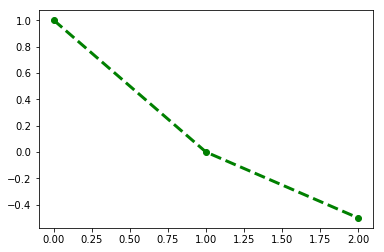

In [101]:
plt.plot([0, 1, 2], [1, 0, -0.5], 'o--g', linewidth=3);
# o: symbol of points
# --: use dashes as line
# g: color is green

### Controlling aspects of the plot

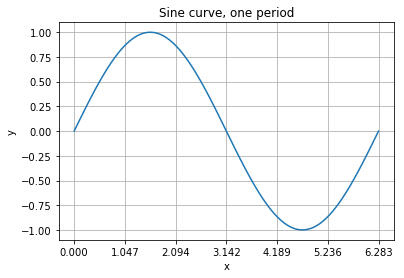

In [102]:
xvals = np.linspace(0, 2*np.pi, 100)
yvals = np.sin(xvals)

plt.plot(xvals, yvals)
plt.xticks(np.linspace(0, 2*np.pi, 7))
plt.title("Sine curve, one period")
plt.xlabel("x"); plt.ylabel("y")
plt.grid();

## Different kinds of plots

### Scatter plot

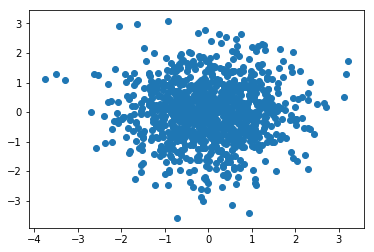

In [103]:
x = np.random.randn(1000)
y = np.random.randn(1000)

plt.scatter(x, y);

### Bar chart

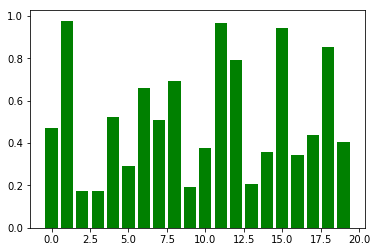

In [104]:
y = np.random.rand(20)
x = np.arange(20)

plt.bar(x, y, facecolor='green');

### Histogram

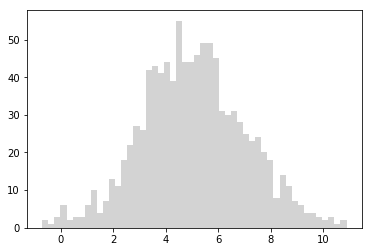

In [105]:
y = np.random.randn(1000) * 2 + 5   ### mean 5, std.dev. 2

plt.hist(y, bins=50, facecolor='lightgray');

# Basic Data Analysis and Regression

**Example:** U.S Cities Dataset.

* Average lowest temperature in January for 56 U.S. cities.
* Time span: 1931-1960
* **Task:** Predict temperature given latitude and longitude

http://lib.stat.cmu.edu/DASL/Datafiles/USTemperatures.html

In [106]:
## Dataset pasted into a multi-line string:
data = """City	JanTemp	Lat	Long
Mobile, AL	44	31.2	88.5
Montgomery, AL	38	32.9	86.8
Phoenix, AZ	35	33.6	112.5
Little Rock, AR	31	35.4	92.8
Los Angeles, CA	47	34.3	118.7
San Francisco, CA	42	38.4	123.0
Denver, CO	15	40.7	105.3
New Haven, CT	22	41.7	73.4
Wilmington, DE	26	40.5	76.3
Washington, DC	30	39.7	77.5
Jacksonville, FL	45	31.0	82.3
Key West, FL	65	25.0	82.0"""
### [...]

In [107]:
data = """City	JanTemp	Lat	Long
Mobile, AL	44	31.2	88.5
Montgomery, AL	38	32.9	86.8
Phoenix, AZ	35	33.6	112.5
Little Rock, AR	31	35.4	92.8
Los Angeles, CA	47	34.3	118.7
San Francisco, CA	42	38.4	123.0
Denver, CO	15	40.7	105.3
New Haven, CT	22	41.7	73.4
Wilmington, DE	26	40.5	76.3
Washington, DC	30	39.7	77.5
Jacksonville, FL	45	31.0	82.3
Key West, FL	65	25.0	82.0
Miami, FL	58	26.3	80.7
Atlanta, GA	37	33.9	85.0
Boise, ID	22	43.7	117.1
Chicago, IL	19	42.3	88.0
Indianapolis, IN	21	39.8	86.9
Des Moines, IA	11	41.8	93.6
Wichita, KS	22	38.1	97.6
Louisville, KY	27	39.0	86.5
New Orleans, LA	45	30.8	90.2
Portland, ME	12	44.2	70.5
Baltimore, MD	25	39.7	77.3
Boston, MA	23	42.7	71.4
Detroit, MI	21	43.1	83.9
Minneapolis, MN	2	45.9	93.9
St. Louis, MO	24	39.3	90.5
Helena, MT	8	47.1	112.4
Omaha, NE	13	41.9	96.1
Concord, NH	11	43.5	71.9
Atlantic City, NJ	27	39.8	75.3
Albuquerque, NM	24	35.1	106.7
Albany, NY	14	42.6	73.7
New York, NY	27	40.8	74.6
Charlotte, NC	34	35.9	81.5
Raleigh, NC	31	36.4	78.9
Bismarck, ND	0	47.1	101.0
Cincinnati, OH	26	39.2	85.0
Cleveland, OH	21	42.3	82.5
Oklahoma City, OK	28	35.9	97.5
Portland, OR	33	45.6	123.2
Harrisburg, PA	24	40.9	77.8
Philadelphia, PA	24	40.9	75.5
Charleston, SC	38	33.3	80.8
Nashville, TN	31	36.7	87.6
Amarillo, TX	24	35.6	101.9
Galveston, TX	49	29.4	95.5
Houston, TX	44	30.1	95.9
Salt Lake City, UT	18	41.1	112.3
Burlington, VT	7	45.0	73.9
Norfolk, VA	32	37.0	76.6
Seattle, WA	33	48.1	122.5
Spokane, WA	19	48.1	117.9
Madison, WI	9	43.4	90.2
Milwaukee, WI	13	43.3	88.1
Cheyenne, WY	14	41.2	104.9"""

In [108]:
instances = [line.split("\t") for line in data.split("\n")]
instances[:10]

[['City', 'JanTemp', 'Lat', 'Long'],
 ['Mobile, AL', '44', '31.2', '88.5'],
 ['Montgomery, AL', '38', '32.9', '86.8'],
 ['Phoenix, AZ', '35', '33.6', '112.5'],
 ['Little Rock, AR', '31', '35.4', '92.8'],
 ['Los Angeles, CA', '47', '34.3', '118.7'],
 ['San Francisco, CA', '42', '38.4', '123.0'],
 ['Denver, CO', '15', '40.7', '105.3'],
 ['New Haven, CT', '22', '41.7', '73.4'],
 ['Wilmington, DE', '26', '40.5', '76.3']]

In [109]:
instances = instances[1:]  ## remove header
print(len(instances))

56


## Basic Data Analysis

In [110]:
cities = [x[0] for x in instances]
temperatures = np.array([float(x[1]) for x in instances])
lat_long = np.array([[float(x[2]), float(x[3])] for x in instances])

In [111]:
print(temperatures.shape, lat_long.shape)

(56,) (56, 2)


### Key figures

In [112]:
### Put all variables into one array
instances = np.vstack([lat_long.T, temperatures]).T
instances.shape

(56, 3)

In [113]:
print("\tlat\tlong\ttemp")
print("min:\t", instances.min(axis=0))
print("mean:\t", instances.mean(axis=0).round(1))
print("median:\t", np.median(instances, axis=0))
print("max:\t", instances.max(axis=0))

	lat	long	temp
min:	 [ 25.   70.5   0. ]
mean:	 [ 39.   91.   26.5]
median:	 [ 39.8  87.8  24.5]
max:	 [  48.1  123.2   65. ]


Note: 

* 0°F $\approx$ -18°C
* 65°F $\approx$ +18°C

### Visual inspection

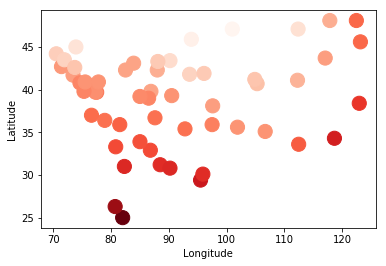

In [114]:
plt.scatter(lat_long.T[1], lat_long.T[0], c=temperatures, s=200,
            cmap=plt.get_cmap("Reds"))
plt.xlabel("Longitude")
plt.ylabel("Latitude");

In [115]:
%%bash
### The "Basemap" library is complicated to install; as of 2015-10-06,
### the version in the Ubuntu packages does not work. Here's how to
### install it directly from the sourceforge repositories:
### (run in external terminal for working sudo prompt)
# sudo -H apt-get install libgeos-dev libgeos++-dev
# wget http://downloads.sourceforge.net/project/matplotlib/matplotlib-toolkits/basemap-1.0.7/basemap-1.0.7.tar.gz\?r\=\&ts\=1446644269\&use_mirror\=vorboss
# sudo -H pip3 install ./basemap-1.0.7.tar.gz

In [116]:
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

def show_map():
    par = [lat_long.T[0].min(), lat_long.T[0].max()]
    mer = [-lat_long.T[1].min(), -lat_long.T[1].max()]

    p = Basemap(projection='lcc', resolution = 'l',
                area_thresh = 10000.0,
                llcrnrlon=mer[1]-5, llcrnrlat=par[0]-5, urcrnrlon=mer[0]+15, urcrnrlat=par[1],
                lat_0=30, lon_0=-100)


    plt.figure(figsize=(10,5))
    p.drawcoastlines()
    p.drawcountries()
    p.fillcontinents(color='lightgray')

    x,y = p(-lat_long.T[1], lat_long.T[0])
    p.scatter(x, y, s=100, c=temperatures, cmap=plt.get_cmap("Reds"), zorder=2);
    plt.show();

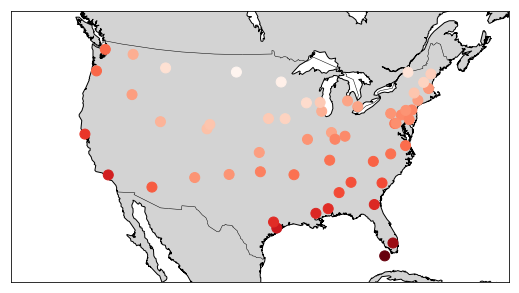

In [117]:
show_map() # (details omitted)

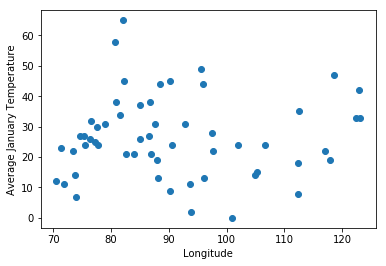

In [118]:
plt.scatter(lat_long.T[1], temperatures)
plt.xlabel("Longitude")
plt.ylabel("Average January Temperature");

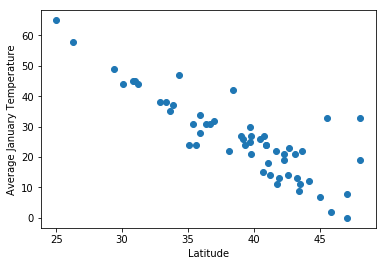

In [119]:
plt.scatter(lat_long.T[0], temperatures)
plt.xlabel("Latitude")
plt.ylabel("Average January Temperature");

## Preparing the Data for Regression

In [120]:
x = lat_long.T[0]  ### extract the "Latitude" column
y = temperatures

## Put everything in one matrix, with constant column prepended
examples = np.vstack([np.ones_like(x), x, y])
examples = examples.T

print(examples.shape)

(56, 3)


## The LMS Algorithm

We implement the basic [LMS Algorithm](http://webis.de/downloads/lecturenotes/machine-learning/unit-en-ml-introduction.pdf#algorithm-least-mean-squares), using [RSS](http://webis.de/downloads/lecturenotes/machine-learning/unit-en-regression.pdf#equation-regression-rss) to measure the error.

Design decisions:

* Store examples in a (n, p+1)-matrix
* Last column is the response variable (temperature)
* Omit convergence check


In [121]:
def rss(examples, w):
    """Compute the residual sum of squares for a linear model.
       
       Arguments:
       examples -- (n, p + 1)-matrix of predictors and response
       w        -- p-vector of linear model weights
    """
    x = examples[:,:-1]    ### First p columns: shape = (n, p)
    y = examples.T[-1]     ### Last column: shape = (n,)
    y_pred = w.dot(x.T)
    rss = (y - y_pred)**2
    ### Note: w.dot(x) has shape = (n,)
    return rss.sum()

In [122]:
def lms(examples, eta, iterations, print_every=1000):
    np.random.seed(2)
    rows, columns = examples.shape
    p = columns - 1 ### last column is the response variable
    w = np.random.uniform(low=-1.0, high=1.0, size=p)
    
    for iteration in range(iterations):
        rand = np.random.randint(0, rows)  ### select random index
        x = examples[rand,:-1]   ### Everything but the last column
        c = examples[rand,-1:]   ### The last column
        
        y = w.dot(x)
        error = c - y            ### Error in the single chosen example
        w += (eta * error * x) 
        
        if iteration % print_every == 0:
            print("Iteration: {} RSS: {:.2f}".format(iteration, 
                                                     rss(examples, w)))
    return w

### Fitting the Model

In [123]:
w = lms(examples, eta=0.0004, iterations=210000, print_every=10000)

Iteration: 0 RSS: 44412.12
Iteration: 10000 RSS: 20942.38
Iteration: 20000 RSS: 16842.54
Iteration: 30000 RSS: 26230.34
Iteration: 40000 RSS: 13257.91
Iteration: 50000 RSS: 21656.82
Iteration: 60000 RSS: 8171.42
Iteration: 70000 RSS: 9470.74
Iteration: 80000 RSS: 11547.16
Iteration: 90000 RSS: 6081.60
Iteration: 100000 RSS: 7422.59
Iteration: 110000 RSS: 5374.08
Iteration: 120000 RSS: 4862.34
Iteration: 130000 RSS: 7214.06
Iteration: 140000 RSS: 5081.61
Iteration: 150000 RSS: 5524.26
Iteration: 160000 RSS: 4234.93
Iteration: 170000 RSS: 5695.81
Iteration: 180000 RSS: 4462.98
Iteration: 190000 RSS: 10190.33
Iteration: 200000 RSS: 3727.04


## Examining our regression model

In [124]:
print(w)

[ 85.55482637  -1.63494865]


In [125]:
latitudes = lat_long.T[0]

def predict_temperature(lat):
    return w.dot([1, lat])

line_x = [min(latitudes), max(latitudes)]
line_y = [predict_temperature(v) for v in line_x]

print(line_x, line_y)

[25.0, 48.100000000000001] [44.681110050907556, 6.9137961682211539]


### Visualizing the line of best fit

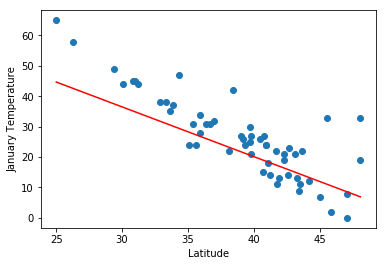

In [126]:
plt.scatter(latitudes, temperatures)
plt.xlabel("Latitude")
plt.ylabel("January Temperature");

plt.plot(line_x, line_y, 'r');

### Can our model predict temperatures outside the U.S.?

How about [Weimar](http://www.wolframalpha.com/input/?i=weimar+germany+coordinates)?

In [127]:
weimar_latitude = 50.983333

def to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5/9

to_celsius(predict_temperature(weimar_latitude))

-16.555725131154382

According to [Wolfram Alpha](http://www.wolframalpha.com/input/?i=weimar+germany+average+temperature+in+january),
the average (1930-today) lowest temperature in January is -17$^{\circ}$C. Surprisingly good for such a simple model!

## Comparison with the direct method

See [slides](http://webis.de/downloads/lecturenotes/machine-learning/unit-en-regression.pdf#minimize-rss-higher-dimensional).

In [128]:
x = examples[:,:-1]
y = examples[:,-1:]

print(x.shape, y.shape)

x[:3]

(56, 2) (56, 1)


array([[  1. ,  31.2],
       [  1. ,  32.9],
       [  1. ,  33.6]])

In [129]:
w1 = np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y)

print(w.T, w1.T)

[ 85.55482637  -1.63494865] [[ 108.72774216   -2.10958785]]


## Visualizing the error

In [130]:
def lms_error(examples, eta, iterations, eval_every):
    np.random.seed(2)
    rows, columns = examples.shape
    p = columns - 1
    w = np.random.uniform(low=-1.0, high=1.0, size=p)
    rsslist = []
    for iteration in range(iterations):
        rand = np.random.randint(0, rows)
        x = examples[rand,:-1]
        c = examples[rand,-1:]
        y = w.dot(x)
        error = c - y            
        w += (eta * error * x) 
        if iteration % eval_every == 0:
            rsslist.append((iteration, rss(examples, w)))
    return w, np.array(rsslist)

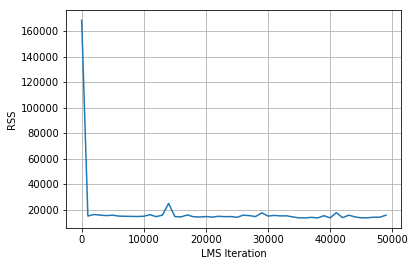

In [131]:
w, rss_values = lms_error(examples, 
                   eta=0.0001,
                   iterations=50000, eval_every=1000)

plt.plot(rss_values.T[0], rss_values.T[1])
plt.xlabel("LMS Iteration")
plt.ylabel("RSS"); plt.grid();

## Improvements to our algorithm

* Improve random sampling (permutation)
* Use mini-batches
* Adaptive learning rate

# The End

More regression topics:

* Multiple predictors
* Different approximation strategies

More data analysis topics:

* Libraries for advanced data analysis (pandas)
* Advanced visualizations